<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gaussian-Distribution" data-toc-modified-id="Gaussian-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gaussian Distribution</a></span><ul class="toc-item"><li><span><a href="#The-variance" data-toc-modified-id="The-variance-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The variance</a></span></li><li><span><a href="#The-covariance" data-toc-modified-id="The-covariance-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The covariance</a></span></li><li><span><a href="#Linear-transformation" data-toc-modified-id="Linear-transformation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Linear transformation</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot</a></span></li></ul></div>

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
style.use('https://raw.githubusercontent.com/JoseGuzman/minibrain/master/minibrain/paper.mplstyle')

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.stats import norm

# Gaussian Distribution

The function that describes a **Gaussian** or a **normal distribution** is:
\begin{equation*}
\mathcal{N}(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation*}

The independent variable x is a random variable X, two parameters **mean** $\mu$ and **variance** $\sigma^2$, which is simply the square of the standard deviation. The man of a Gaussian distribution shifts the center of the Gaussian, whereas the standard deviation is a measure of the spread of the Gaussian.

The probability density function (pdf) tell us the probability of observing an input $x$ given a normal distribution. Because it is a probability distribution, all values are negative and their sum is one.

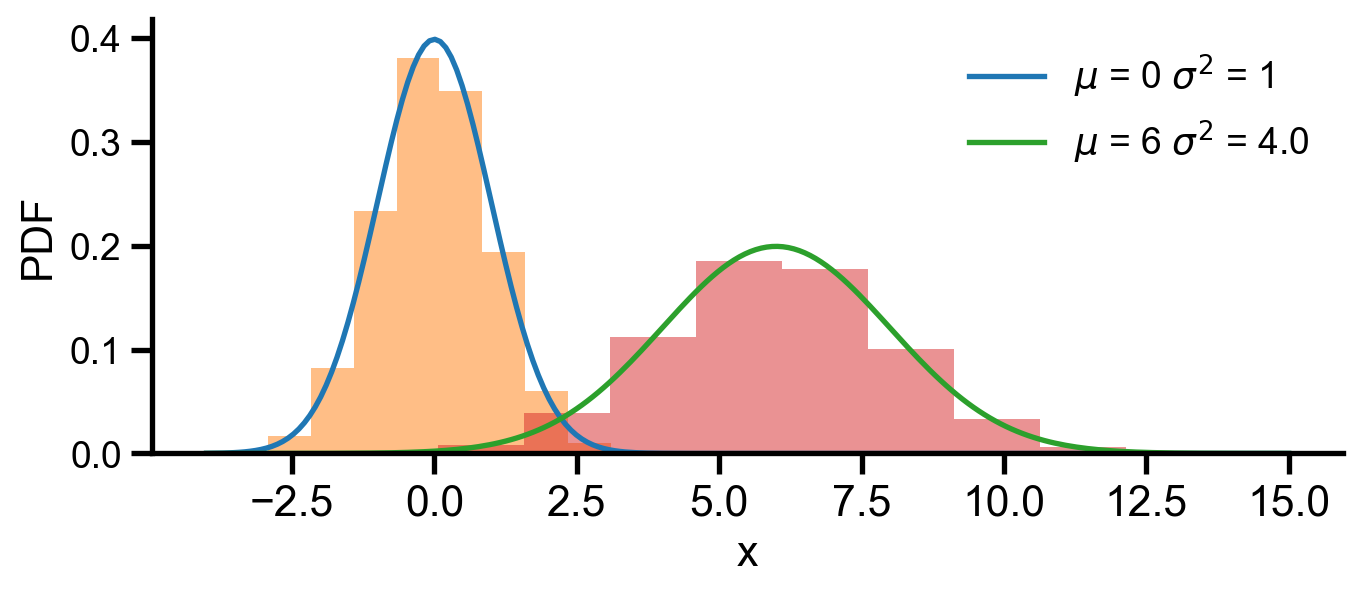

In [263]:
mu = 0
sigma = 1 # std
rv = norm(loc = mu, scale = sigma)

x = np.linspace(-4,15, 200)

plt.plot(x, rv.pdf(x), label=f'$\mu$ = {mu} $\sigma^2$ = {sigma**2:}')
plt.hist(rv.rvs(10000), density=True, alpha=0.5);

mu = 6
sigma = 2.
rv = norm(loc = mu, scale = sigma)

plt.plot(x, rv.pdf(x), label=f'$\mu$ = {mu} $\sigma^2$ = {sigma**2:}')
plt.hist(rv.rvs(10000), density=True, alpha=0.5);

plt.xlabel('x'); plt.ylabel('PDF')
plt.legend()

## The variance

The variance measures the dispersion of a random variable, like the height of a person in a population. It is given by:

\begin{equation}
\operatorname{Var}(x) = \sigma^2 = \operatorname{E}\left[(x - \mu)^2 \right] 
\end{equation}

The variance of a set of equally likely values can be written as


\begin{equation}
\sigma^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \mu)^2
\end{equation}

where $n$ is the number of samples, $\mu$ is the mean of the random variable $x$.

## The covariance

When we discuss multivariate data - we add  dimensions e.g., taking the height and the weight of a person -. We will have now 
a vector whose element is the mean of every dimension. The resulting mixture of Gaussian results in a vector of means, and a vector of variances. Another source of variability arises from the tendency of the 2 dimensions to vary together. It is called the **covariance** and it is calculates for the x,y dimensions as follows:

\begin{equation}
\operatorname{cov}(x, y) = \frac{\sum(x_i-\bar{x})(y-\bar{y})}{n-1}
\end{equation}



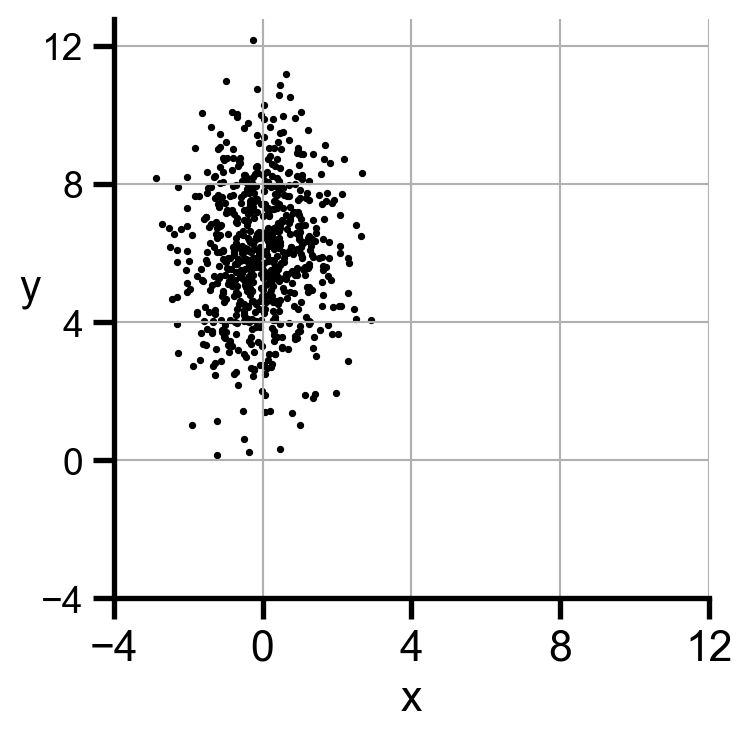

In [312]:
np.random.seed(2020)
x = np.random.normal(loc = 0, scale = 1, size = 700)
y = np.random.normal(loc = 6, scale = 2, size = 700)

X = np.vstack((x,y)).T
plt.figure(figsize=(4,4))

plt.scatter(x, y, s=3, color='k')
plt.xticks(np.arange(-4,15, 4))
plt.yticks(np.arange(-4,15, 4))
plt.xlabel('x'), plt.ylabel('y', rotation = 0)
plt.grid('on')


In [292]:
def mycov(x,y):
    """
    Computes the covariance between x and y, being x and y two vectors.
    Assumes x.size == y.size
    """
    cov = lambda x,y: np.sum( ( x-x.mean() ) * ( y-y.mean() ) )/(len(x)-1) 
    
    C = np.array( [ [cov(x,x), cov(x,y) ], [cov(y,x), cov(y,y)] ])
    return(C)
    

The covariance is always measured between two dimensions. If we have datasets with more than two dimensions
there is more than one covariance to be calculated, and we can use a matrix.

The covariance can be calculated as entries in a covariance matrix, which is a square matrix. The diagonal of the
matrix are the variances of the random variables, and the other entries the covariances.

\begin{equation}
\Sigma = \begin{pmatrix} \text{var}(x) & \text{cov}(x,y) \\ \text{cov}(y,x) &\text{var}(y)\end{pmatrix}
\end{equation}

In [293]:
mycov(x,y) #x_var = 0.99, y_var = 3.64 (almost 4)

array([[0.99229993, 0.071641  ],
       [0.071641  , 3.64151616]])

The covariance matrix can be computed from a data set with zero mean with:
    
\begin{equation}
C = \frac{XX^T}{n-1}
\end{equation}

If X is the column matrix of variables

In [294]:
X.shape # matrix of 500 observations and 2 dimensions (features)

(700, 2)

In [295]:
np.matmul(X.T,X)/(len(x)-1) # didn't substract mean!

array([[ 0.99371217, -0.1542743 ],
       [-0.1542743 , 39.78124965]])

In [296]:
F= X - np.mean(X, axis=0)

In [297]:
np.matmul(F.T,F)/(len(x)-1) # now mean substracted!

array([[0.99229993, 0.071641  ],
       [0.071641  , 3.64151616]])

In [298]:
np.cov(x,y) # numpy substracts the mean

array([[0.99229993, 0.071641  ],
       [0.071641  , 3.64151616]])

In [299]:
np.cov(X.T)

array([[0.99229993, 0.071641  ],
       [0.071641  , 3.64151616]])

The covariance is ultimately with the correlation coefficient. The correlation coefficient is the normlized
version of the covariance, and ragnes between -1 and 1.

\begin{align}
\rho = \frac{\text{cov}(x_1,x_2)}{\sqrt{\sigma_1^2 \sigma_2^2}}.
\end{align}

We can use the correlation coefficient to calculate a new covariance matrix.

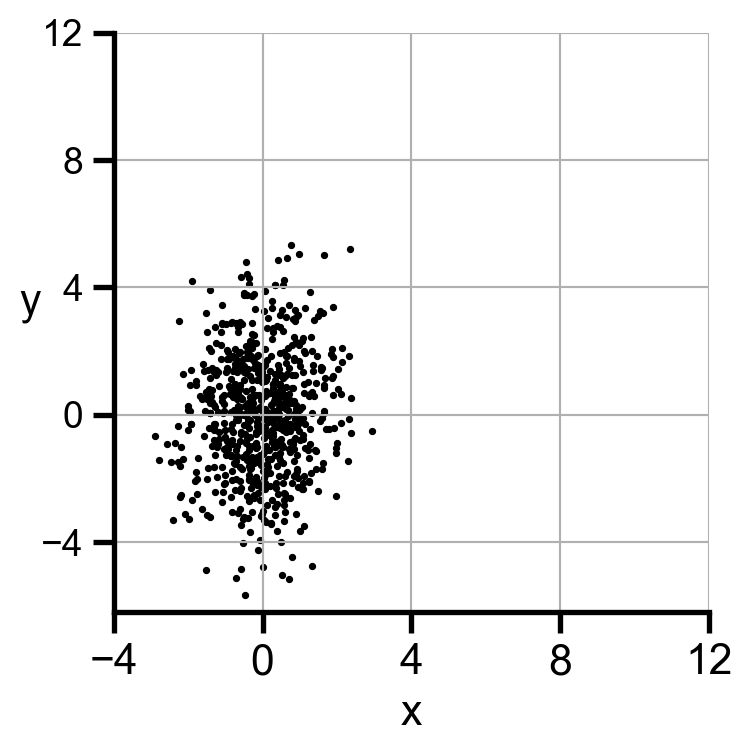

In [374]:
C = np.cov(X.T)
X = np.random.multivariate_normal(mean = [0, 0], cov = C, size = 700)

plt.figure(figsize=(4,4))

plt.scatter(X[:,0], X[:,1], s=3, color='k')
plt.xticks(np.arange(-4,15, 4))
plt.yticks(np.arange(-4,15, 4))
plt.xlabel('x'), plt.ylabel('y', rotation = 0)
plt.grid('on')

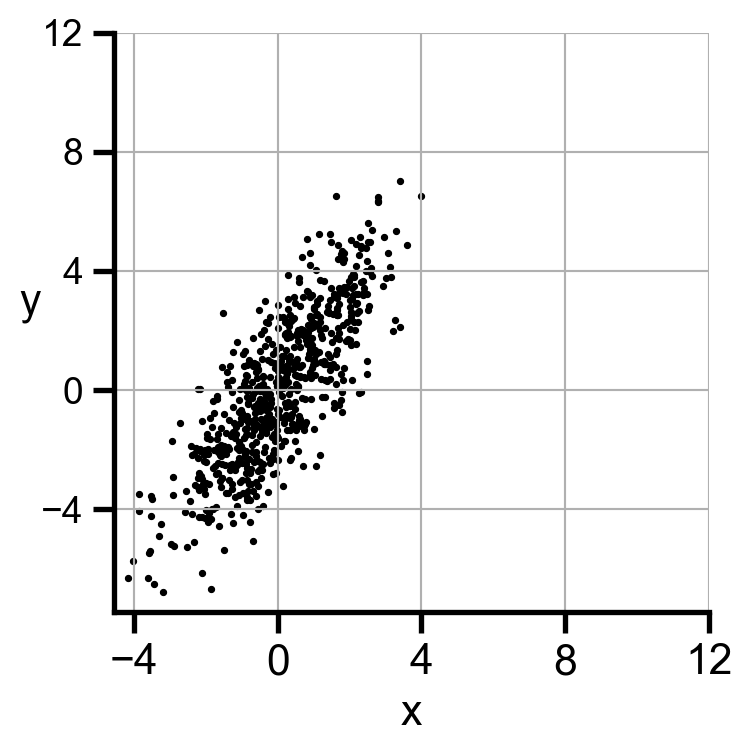

In [443]:
rho = 0.8
var1, var2 = 2, 6
cov = rho*np.sqrt(var1*var2)
C = np.array([[var1, cov],[cov, var2]])
X = np.random.multivariate_normal(mean = [0, 0], cov = C, size = 700)

plt.figure(figsize=(4,4))

plt.scatter(X[:,0], X[:,1], s=3, color='k')
plt.xticks(np.arange(-4,15, 4))
plt.yticks(np.arange(-4,15, 4))
plt.xlabel('x'), plt.ylabel('y', rotation = 0)
plt.grid('on')

## Linear transformation 

We can transform the covariance matrix with 

In [446]:
C2 = np.cov(X.T)

In [444]:
C

array([[2.        , 2.77128129],
       [2.77128129, 6.        ]])

In [445]:
np.cov(X.T)#C2

array([[2.05315331, 2.8993871 ],
       [2.8993871 , 6.31674371]])

# Plot

In [426]:
A = np.array([[0.6165, 0.6154],[0.617554, 0.7165]])

In [427]:
np.linalg.eig(A)

(array([0.04799961, 1.28500039]), array([[-0.73454232, -0.67728279],
        [ 0.67856288, -0.73572279]]))

In [428]:
np.linalg.norm([-0.73454232, -0.67728279])

0.9991318218839627

In [429]:
A = np.array([[2, 3],[2,1]])
v = np.array([1,3])
np.matmul(A,v)

array([11,  5])

In [455]:
C2

array([[2.05315331, 2.8993871 ],
       [2.8993871 , 6.31674371]])

In [456]:
eigVal, eigVect = np.linalg.eig(C2)

In [457]:
eigVal

array([0.58619923, 7.78369778])

In [458]:
eigVect

array([[-0.89229231, -0.45145812],
       [ 0.45145812, -0.89229231]])

In [459]:
comp0, comp1 = eigVect[:,0]*eigVal[0], eigVect[:,1]*eigVal[1]

In [453]:
comp1 

array([-0.26954007,  0.11793324])

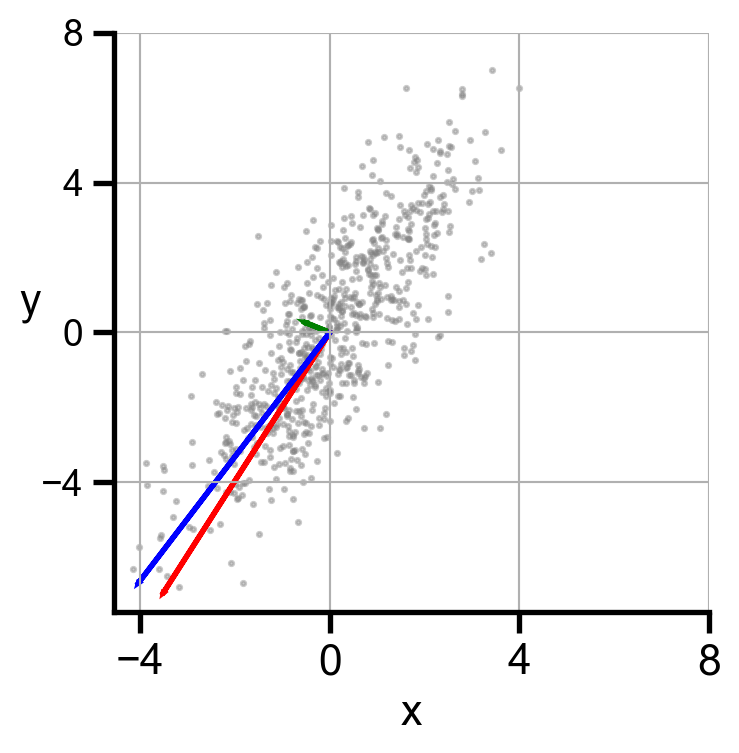

In [460]:
plt.figure(figsize=(4,4))

plt.scatter(X[:,0], X[:,1], s=3, color='gray', alpha=0.4)
plt.arrow(x=0, y=0, dx =comp0[0],  dy =comp0[1], lw=2, color='g')
plt.arrow(x=0, y=0, dx =comp1[0],  dy =comp1[1], lw=2, color='r')
mysum = comp0 + comp1
plt.arrow(x=0, y=0, dx = mysum[0], dy = mysum[1], lw = 2, color='b')
    #plt.plot([0, e*v[0]],[0, e*v[1]], 'r-', lw=2)
    
plt.xticks(np.arange(-4,9, 4))
plt.yticks(np.arange(-4,9, 4))

plt.xlabel('x'), plt.ylabel('y', rotation =0)
plt.grid('on')

In [416]:
np.std(X[:,1])**2

3.597249773364726

In [314]:
eVe[0]*eVa.T[0]

array([-0.99000262,  0.02675243])